In [1]:
import ROOT,argparse, sys, os
from ROOT import TRatioPlot, RooFit

Welcome to JupyROOT 6.10/09


In [3]:
sys.path.append('/home/rosedj1/HiggsMeasurement/CMSSW_8_0_32/src/')
sys.path.append('/home/rosedj1/HiggsMeasurement/CMSSW_8_0_32/src/leptonPtErrorCorrector/doCorrection/')

In [4]:
from leptonPtErrorCorrector.doCorrection.pTErrCorrector import GetCorrection
from PyUtils.fileUtils import copyFile, makeDirs

/cvmfs/cms.cern.ch/slc6_amd64_gcc630/lcg/root/6.10.08/lib/ROOT.py:432: UserWarning: "from ROOT import *" is not supported under IPython
  warnings.warn( '"from ROOT import *" is not supported under IPython' )


## getLambda1_doBoth.py

In [5]:
pTLow = 7.0
pTHigh = 100
etaLow = 0.9 
etaHigh = 1.8
fs = 'mu'
isData = False
DEBUG = 1
getPara = 0
getLambda = 1
shapeParaDir = "/home/rosedj1/HiggsMeasurement/CMSSW_8_0_32/src/leptonPtErrorCorrector/doCorrection/shapeParameters_jake/"
outputDir = "/home/rosedj1/public_html/Higgs/HiggsMassMeas/ParameterPlotsTests/"
inputDir = "/raid/raid8/ferrico/HZZ4l/CMSSW_10_2_5/src/leptonPtErrorCorrector/makeSlimTree/output/DY_2018/"
inputfilename = "DYJetsToLL_M-50_kalman_v4_m2mu_v2.root"

#____________________________________________________________________________________________________
### AUTOMATIC STUFF
def ParseOption():
    parser = argparse.ArgumentParser(description='submit all')
    parser.add_argument('--ptLow', dest='ptLow', type=float)
    parser.add_argument('--ptHigh', dest='ptHigh', type=float)
    parser.add_argument('--etaLow', dest='etaLow', type=float)
    parser.add_argument('--etaHigh', dest='etaHigh', type=float)
    parser.add_argument('--isData', dest='isData', action='store_true', default=False)
    parser.add_argument('--fs', dest='fs', type=str)
    parser.add_argument('--shapeParaDir', dest='shapeParaDir', type=str)
    parser.add_argument('--inputDir', dest='inputDir', type=str)
    parser.add_argument('--outputDir', dest='outputDir', type=str)
    parser.add_argument('--inputFileName', dest='inputFileName', type=str)
    parser.add_argument('--debug', dest='debug', type=int)
    parser.add_argument('--getPara', dest='getPara', type=int)
    parser.add_argument('--getLambda', dest='getLambda', type=int)
    args = parser.parse_args()
    return args

#args=ParseOption()
## Flags passed in from doLambda1.sh
# pTLow          = args.ptLow           
# pTHigh         = args.ptHigh          
# etaLow         = args.etaLow          
# etaHigh        = args.etaHigh         
# fs             = args.fs              
# isData         = args.isData          
# shapeParaDir   = args.shapeParaDir
# inputDir       = args.inputDir
# outputDir      = args.outputDir #getLambda1/"
# inputfilename  = args.inputFileName
# DEBUG          = args.debug
# getPara        = args.getPara
# getLambda      = args.getLambda
## Make output dirs if they don't exist and copy index.php file.
makeDirs(outputDir)
makeDirs(shapeParaDir)
copyFile("/home/rosedj1/","index.php",outputDir)
sys.path.append(shapeParaDir)

#_____________________________________________________________________________________
### MAIN
binEdge = {'pTLow': pTLow, 'pTHigh':pTHigh, 'etaLow':etaLow, 'etaHigh':etaHigh}
doLambda1 = True
lambdas = {'lambda1':1, 'lambda2':1} # starting values for all lambdas
shapePara = {"mean":0, "alpha":0, "n":0, "tau":0, "fsig":0} # starting values for all parameters

path = {}
path['input']    = inputDir
path['output']   = outputDir
path['filename'] = inputfilename
#path['input'] = "/raid/raid9/mhl/HZZ4L_Run2_post2016ICHEP/outputRoot/DY_2015MC_kalman_v4_NOmassZCut_addpTScaleCorrection/"
#path['input'] = "/raid/raid9/mhl/HZZ4L_Run2_post2016ICHEP/outputRoot/DY_2015MC_kalman_v4_NOmassZCut_useLepFSRForMassZ/"
#path['input'] = "/raid/raid7/rosedj1/ForPeeps/ForFilippo/"
#path['output'] = "/home/mhl/public_html/2016/20161125_mass/test/" #getLambda1/"

## Get Parameters

In [6]:
#_____ Get Parameters _____#
if getPara and not getLambda:
    print "Getting parameters..."
    ### Get CB parameters
    # makes a GetCorrection object
    # shapePara starts off with all zeros
    tag = "doLambda1_getPara_" + fs
    getCorr_getPara = GetCorrection(binEdge, isData, fs, doLambda1, lambdas, shapePara, path, tag) 

    if DEBUG:
        print "\nParameters of getCorr_getPara object BEFORE fit:"
        for key,val in getCorr_getPara.__dict__.items():
            print key,":",val

    # then it goes through the grind, and the parameters get updated
    PmassZ, chi2, dof, ch, latex = getCorr_getPara.DriverGetPara()

    if DEBUG:
        print "\nParameters of getCorr_getPara object AFTER fit:"
        for key,val in getCorr_getPara.__dict__.items():
            print key,":",val

    # update global shapePara dict
    shapePara = getCorr_getPara.shapePara
    with open(shapeParaDir + getCorr_getPara.name.replace('.','p') + '.py', 'w') as f:
    #with open('shapeParameters/' + getCorr_getPara.name.replace('.','p') + '.py', 'w') as f:
         f.write('shapePara = ' + str(shapePara) + ' \n')
    print "getLambda1_doPara.py COMPLETE\n\n"


#_____ Get Lambda _____#
elif getLambda and not getPara:
    print "Getting Lambda..."
    tag = "doLambda1_getLambda_" + fs
    getCorr_getLambda = GetCorrection(binEdge, isData, fs, doLambda1, lambdas, shapePara, path, tag)
    #tmpPara_ =  __import__('test', globals(), locals())

    if DEBUG:
        print "\nParameters of getCorr_getLambda object BEFORE __import__(getCorr_getPara):\n"
        for key,val in getCorr_getLambda.__dict__.items():
            print key,":",val

    ## ???
    tmpPara_ =  __import__(getCorr_getLambda.name.replace('getLambda', 'getPara').replace('.','p'), globals(), locals())

    if DEBUG:
        print "\ngetCorr_getLambda.shapePara after __import__ and before DriverGetLambda():\n",getCorr_getLambda.shapePara
        for key,val in getCorr_getLambda.__dict__.items():
            print key,":",val
        
        print "\ntmpPara_.shapePara after __import__ and before DriverGetLambda():\n",tmpPara_.shapePara
        for key,val in getCorr_getLambda.__dict__.items():
            print key,":",val

    getCorr_getLambda.shapePara = tmpPara_.shapePara
    print "\ngetCorr_getLambda.shapePara:\n", getCorr_getLambda.shapePara

    # The big boy. This keeps the old parameters, finds sigma and lambda.
    PmassZ, chi2, dof, ch, latex = getCorr_getLambda.DriverGetLambda()

    if DEBUG:
        print "\nParameters of getCorr_getLambda.shapePara AFTER fit:"
        for key,val in getCorr_getLambda.__dict__.items():
            print key,":",val
    print "getLambda1_doLambda COMPLETE\n"

else:
    print """   ERROR!!!
             Either both getPara and getLambda were specified
             at the same time, or neither was given!
             Exiting now."""
    sys.exit()

Getting Lambda...
tree opened

Parameters of getCorr_getLambda object BEFORE __import__(getCorr_getPara):

etaLow : 0.9
pTLow_1st : 7.0
GENZ_width : 2.44
treeFile : <ROOT.TFile object ("/raid/raid8/ferrico/HZZ4l/CMSSW_10_2_5/src/leptonPtErrorCorrector/makeSlimTree/output/DY_2018/DYJetsToLL_M-50_kalman_v4_m2mu_v2.root") at 0x299a4d0>
tag : doLambda1_getLambda_mu
outpath : /home/rosedj1/public_html/Higgs/HiggsMassMeas/ParameterPlotsTests/
etaHigh : 1.8
massZErr_hi : 7.2
Data_Zlls : <ROOT.RooDataSet object at 0x6572b64>
Data_Zlls_w : <ROOT.RooDataSet object at 0x6572e04>
etaLow_1st : 0.9
filename : DYJetsToLL_M-50_kalman_v4_m2mu_v2.root
pTHigh : 100
rFit : <ROOT.RooFitResult object at 0x5a59b80>
GENZ_mean : 91.19
Lambdas : {'lambda1': 1, 'lambda2': 1, 'lambda': 1}
fs : mu
massZErr_lo : 0.2
pTHigh_1st : 100
Data_Zlls_binned : <ROOT.RooDataHist object at 0x656aa40>
shapePara : {'tau': 0, 'alpha': 0, 'n': 0, 'fsig': 0, 'mean': 0}
cut :  (massZ > 60 && massZ < 120) &&  (massZErr > 0.2 && mass

Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available
Warning in <TTreeReader::SetEntryBase()>: The TTree / TChain has an associated TEntryList. TTreeReader ignores TEntryLists unless you construct the TTreeReader passing a TEntryList.
Info in <TCanvas::Print>: png file /home/rosedj1/public_html/Higgs/HiggsMassMeas/ParameterPlotsTests/DYJetsToLL_M-50_kalman_v4_m2mu_v2_Pt_7.0_to_100_Eta_0.9_to_1.8_doLambda1_getLambda_mu.png has been created
Info in <TCanvas::Print>: pdf file /home/rosedj1/public_html/Higgs/HiggsMassMeas/ParameterPlotsTests/DYJetsToLL_M-50_kalman_v4_m2mu_v2_Pt_7.0_to_100_Eta_0.9_to_1.8_doLambda1_getLambda_mu.pdf has been created


In [7]:
getCorr_getLambda.w.var("massZ")

<ROOT.RooRealVar object ("massZ") at 0xa62d970>

In [8]:
for each in "alpha,breitWignerGamma,breitWignerMean,fsig,lambda,massZ,massZErr,mean,n,tau".split(','):
    print each, getCorr_getLambda.w.var(each).getVal()
    
# getCorr_getLambda.w.var("breitWignerGamma").getVal()
# getCorr_getLambda.w.var("breitWignerMean").getVal()
# getCorr_getLambda.w.var("fsig").getVal()
# getCorr_getLambda.w.var("lambda").getVal()
# getCorr_getLambda.w.var("massZ").getVal()
# getCorr_getLambda.w.var("massZErr").getVal()
# getCorr_getLambda.w.var("mean").getVal()
# getCorr_getLambda.w.var("n").getVal()
# getCorr_getLambda.w.var("tau").getVal()

alpha 1.66225917311
breitWignerGamma 2.44
breitWignerMean 91.19
fsig 0.983497019598
lambda 1.2339322532
massZ 90.0
massZErr 3.7
mean 0.161973563453
n 1.43858830489
tau -0.0614980914669


In [9]:
getCorr_getLambda.Data_Zlls.Print()

RooDataSet::Zlls[massZ,massZErr,weight] = 1924362 entries


In [10]:
rooargset = getCorr_getLambda.Data_Zlls.get()
rooargset.ls()

OBJ: RooArgSet		Set of RooAbsArg objects : 0 at: 0x6573294


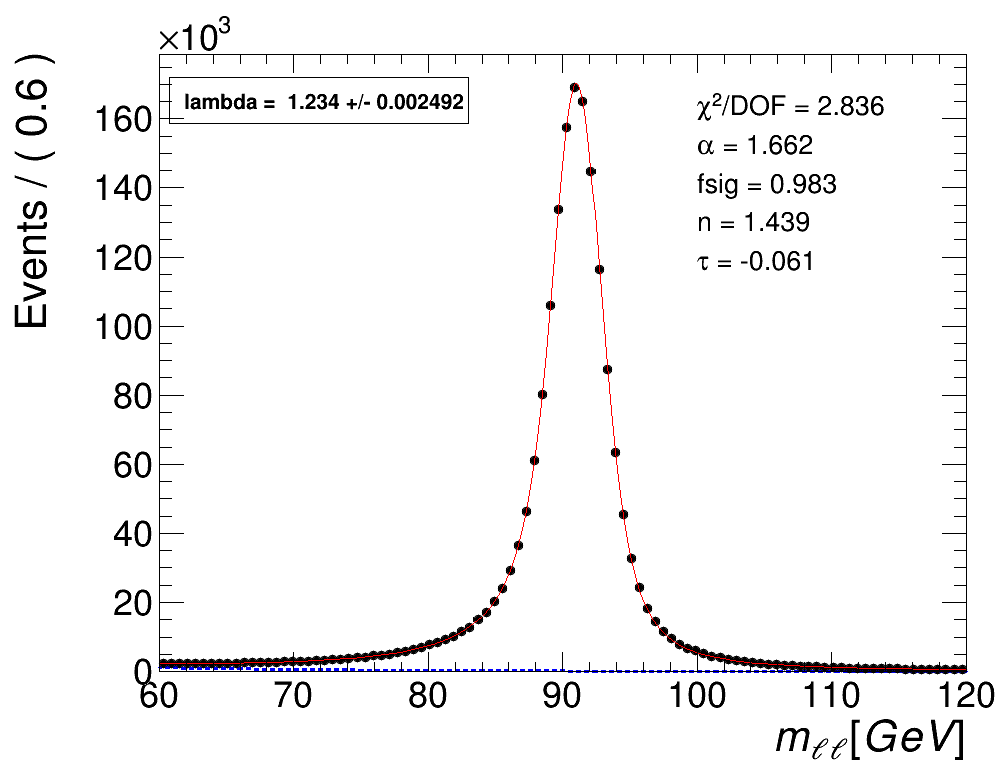

In [11]:
ch.Draw()

In [12]:
getCorr_getLambda.rFit.floatParsFinal().getSize()

1

In [13]:
getCorr_getLambda.rFit

<ROOT.RooFitResult object ("fitresult_model_Zlls_binned") at 0xa914200>

In [14]:
getCorr_getLambda.w.Print()


RooWorkspace(w) workspace contents

variables
---------
(alpha,breitWignerGamma,breitWignerMean,fsig,lambda,massZ,massZErr,mean,n,tau)

p.d.f.s
-------
RooBreitWigner::BW[ x=massZ mean=breitWignerMean width=breitWignerGamma ] = 0.344293
RooCBShape::CB[ m=massZ m0=mean sigma=sigma alpha=alpha n=n ] = 8.33271e-85
RooFFTConvPdf::CBxBW[ BW(massZ) (*) CB(massZ) ] = 0.067622
RooExponential::bkg[ x=massZ c=tau ] = 0.00394689
RooAddPdf::model[ fsig * CBxBW + [%] * bkg ] = 20.201

functions
--------
RooFormulaVar::sigma[ actualVars=(lambda,massZErr) formula="@1*@0" ] = 4.56555

embedded precalculated expensive components
-------------------------------------------
uid = 0 key=CBxBW_BW_CONV_CB_CACHEHIST_Obs[massZ]_BufFrac0.1_BufStrat0 value=RooDataHist::CBxBW_BW_CONV_CB_CACHEHIST_Obs[massZ]_BufFrac0.1_BufStrat0 parameters=( alpha=1.66226 breitWignerGamma=2.44 breitWignerMean=91.19 lambda=1.23393 massZErr=3.7 mean=0.161974 n=1.43859 )


In [15]:
getCorr_getLambda.w.pdf("CBxBW")

<ROOT.RooFFTConvPdf object ("CBxBW") at 0xa5a3e80>

In [16]:
getCorr_getLambda.w.var("massZ").frame(RooFit.Bins(10))

<ROOT.RooPlot object ("frame_massZ_ae7d990") at 0xae7d990>

In [17]:
rpl = TRatioPlot()

# Recreate the fit plot.

In [23]:
fitplotframe = getCorr_getLambda.w.var("massZ").frame(RooFit.Bins(50))
fitplotframe.GetXaxis().SetTitle("m_{ll} [GeV]")
fitplotframe.GetYaxis().SetTitleOffset(1.1)

getCorr_getLambda.Data_Zlls_w.plotOn(fitplotframe)

<ROOT.RooPlot object ("frame_massZ_aec41e0") at 0xaec41e0>

In [19]:
getCorr_getLambda.rFit

<ROOT.RooFitResult object ("fitresult_model_Zlls_binned") at 0xa914200>

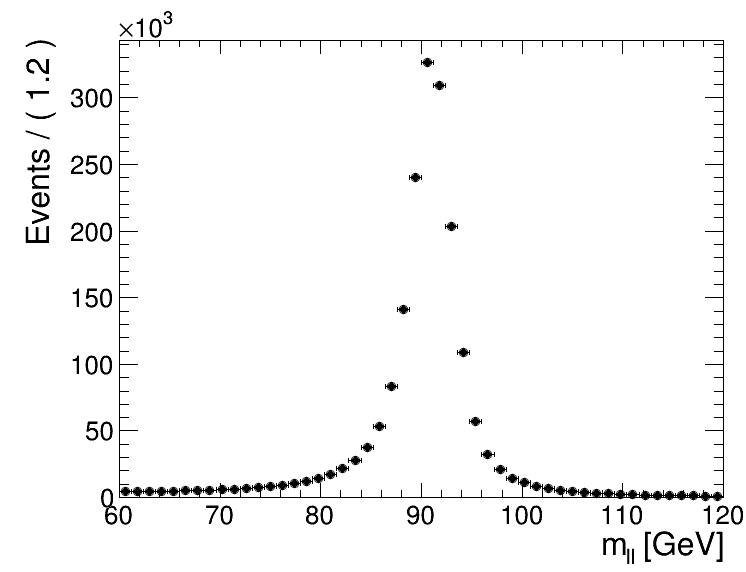

In [26]:
#c4 = ROOT.TCanvas("c4","c4",750,600)
c4.Draw()
fitplotframe.Draw()
#c3.SaveAs("/home/rosedj1/public_html/Higgs/HiggsMassMeas/ParameterPlotsTests/DELETEhim.png")